In [107]:
#Import library
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets 
import sklearn.linear_model 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import accuracy_score
import urllib.request as request
import csv

In [108]:
#Initialize random
np.random.seed(100)

In [171]:
#Define activation function
def tanh(x):
    """It is a hyperbolic tangent function-Tanh. 
    The function: f(x) = (1-exp(-2x))/(1+exp(-2x)).
    Function range from -1-1, with zero centered 
    Vanishing gradient problem - saturate and kill gradient """
    return (np.exp(2*x) - 1)/(np.exp(2*x) +1)
def relu(x):
    """Rectified Linear unit. 
    The function: f(x) = max(0,x)
    No vaninish gradient problem
    Should be used for hidden layers only. 
    Should not be used for output layers"""
    return np.argmax(0,x)
def softmax(x):
    """The function: f(x)= exp(x)/sum(exp(x)).
    It turns logits into probabilitis that sum to 1.
    Compute softmax values for each sets of scores in x"""
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
def sigmoid(x):
    """It is an activation function of form: f(x) = 1/(1+exp(-x))
    It ranges from 0-1, with a shape S-curve
    Vanishing gradient problem - saturate and kill gradient
    Slow convergence 
    Output is not zero centered. """
    return 1/(1+exp(-x))

#Define loss derivatives
def loss_derivative(y,y_hat):
    """Get the loss derivative of (y_hat-y)"""
    return (y_hat-y)

def tanh_derivative(x):
    return (1 - np.power(x, 2))

def softmax_loss(y, y_hat):
    min_val = 0.000000000001
    n = y.shape[0]
    loss = -1/n*np.sum(y * np.log(y_hat.clip(min=min_val)))
    return loss 

#Forward Propagation
def forward_propagation(model,a0):
    #load parameters 
    w1,b1,w2,b2,w3,b3 = model["w1"], model["b1"], model["w2"], model["b2"], model["w3"], model["b3"]
    #Calculate the linear combination
    z1 = a0.dot(w1) + b1
    #Put it through the first activation 
    a1 = tanh(z1)
    #Calculate the second linear combination -1st hidden 
    z2 = a1.dot(w2) + b2 
    #Put it through the second activation - 2nd hidden layer 
    a2= tanh(z2)
    #Calculate the third linear step 
    z3 = a2.dot(w3) + b3 
    #Put it throught the third activation - 
    a3 = softmax(z3)
    #Store all results in these values
    cache = {'a0': a0, 'z1': z1, 'a1': a1, 'z2': z2, 'a2': a2, 'a3': a3, 'z3': z3}
    return cache 

#Backward Propagation 
def backward_propagation(model,cache,y):
    #Load parameter
    w1,b1,w2,b2,w3,b3 = model["w1"], model["b1"], model["w2"], model["b2"], model["w3"], model["b3"]
    #Load forward propagation results 
    a0, a1, a2, a3 = cache['a0'], cache['a1'], cache['a2'], cache['a3'] 
    #Get the number of samples 
    n = y.shape[0]
    #Calculate the loss derivatives with respect to outputs
    dz3 = loss_derivative(y=y,y_hat =a3)
    #Calculate the loss derivatives with respective to the second layer weight
    dw3 = 1/n*(a2.T).dot(dz3)
     #Calculate the loss derivatives with respective to the second layer bias 
    db3 = 1/n*np.sum(dz3, axis=0)
    #Calculate the loss derivatives with respective to the second layer 
    dz2 = np.multiply(dz3.dot(w3.T), tanh_derivative(a2))
    #Calculate the loss derivatives with respective to the first layer weight 
    dw2 = 1/n *np.dot(a1.T, dz2)
    #Calculate the loss derivatives with respective to the first layer bias 
    db2 = 1/n*np.sum(dz2, axis=0)
    #Calculate the loss derivatives with respective to the linear 
    dz1= np.multiply(dz2.dot(w2.T), tanh_derivative(a1))
    #Calculate the loss derivatiives with respective to the linear weight
    dw1 = 1/n*np.dot(a0.T, dz1)
    #Calculate the loss derivatives with respective to the linear bias
    db1 = 1/n*np.sum(dz1,axis=0)
    #Store the graditent 
    grads = {'dw3':dw3, 'db3': db3, 'dw2': dw2, 'db2': db2, 'dw1': dw1, 'db1': db1}
    return grads 
#Training Phase 
def initialize_parameters(nn_input_dim, nn_hdim, nn_output_dim):
    #First layer weights
    w1 = 2 * np.random.randn(nn_input_dim, nn_hdim) -1 
    #First layer bias 
    b1 = np.zeros((1,nn_hdim))
    #Second layer weights 
    w2 = 2 * np.random.randn(nn_hdim, nn_hdim)-1
    #Second layer bias 
    b2 = np.zeros((1,nn_hdim))
    #Output layer weights 
    w3= 2 * np.random.randn(nn_hdim, nn_output_dim) -1 
    #Output layer bias 
    b3 = np.zeros((1,nn_output_dim))
    #Package and return model
    model = { 'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2,'w3':w3,'b3':b3}
    return model
#Update parameter
def update_parameters(model,grads,learning_rate):
    #Load parameter 
    w1,b1, w2, b2, w3, b3=model['w1'], model['b1'], model['w2'], model['b2'], model['w3'], model['b3']
    #Update parameter
    w1  -= learning_rate * grads['dw1']
    b1  -= learning_rate * grads['db1']
    w2  -= learning_rate * grads['dw2']
    b2  -= learning_rate * grads['db2']
    w3  -= learning_rate * grads['dw3']  
    b3  -= learning_rate * grads['db3']
    #Store and return parameters 
    model = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2, 'w3': w3, 'b3': b3}
    return model

#Predict model
def predict(model,x):
    #Do forward propagation
    c = forward_propagation(model,x)
    #Get prediction y_hat
    y_hat = np.argmax(c['a3'], axis=1)
    return y_hat 

#Calculate prediction accuracy
def calc_accuracy(model,x,y):
    #Get the total number of samples
    n = y.shapes[0]
    #Do prediction
    pred = predict(model,x)
    # Transform the shape of prediction
    pred = pred.reshape(y.shape)
    #Calculate the number of wrong examples
    error = np.sum(np.abs(pred-y))
    #Calculate accuracy
    accuracy = (n-error)/n * 100
    return accuracy 

#Implement the model -training 
def train(model,X_,y_, learning_rate, epochs = 100, print_loss = False):
    losses = []
    #Gradient descent. Loop over epochs 
    for i in range(0, epochs):
        #Forward propagation
        cache = forward_propagation(model,X_)
        #Backward propagation
        grads = backward_propagation(model, cache, y_)
        #Update gradient descent parameter
        model = update_parameters(model=model, grads=grads, learning_rate = learning_rate)
        #Print loss and accuracy for each of 10 interation
        if print_loss and i % 100 == 0:
            a3 = cache['a3']
            print('Loss after iteration ', i, ':', softmax_loss(y_,a3))
            y_hat = predict(model,X_)
            y_true = y_.argmax(axis=1)
            print('Accuracy after iteration ', i, ':', accuracy_score(y_pred=y_hat, y_true = y_true)*100, ' %')
            losses.append(accuracy_score(y_pred=y_hat,y_true=y_true)*100)
    return model, losses


In [172]:
#Get data 
iris = datasets.load_iris()
iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
#Get dummy
iris_data = pd.concat([iris_data, pd.get_dummies(iris_data['target'],prefix = 'target_')], axis=1)
print(iris_data.head(2))
#Get x and y
y = iris_data[['target__0.0', 'target__1.0', 'target__2.0']].values
X = iris_data.drop(['target__0.0', 'target__1.0', 'target__2.0'], axis = 1).values
X.shape, y.shape

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   

   target  target__0.0  target__1.0  target__2.0  
0     0.0            1            0            0  
1     0.0            1            0            0  


((150, 5), (150, 3))

Loss after iteration  0 : 5.410586105017118
Accuracy after iteration  0 : 48.66666666666667  %
Loss after iteration  100 : 0.15421731727454951
Accuracy after iteration  100 : 97.33333333333334  %
Loss after iteration  200 : 0.08248612410051487
Accuracy after iteration  200 : 99.33333333333333  %
Loss after iteration  300 : 0.05960458724151888
Accuracy after iteration  300 : 99.33333333333333  %
Loss after iteration  400 : 0.045236426052703484
Accuracy after iteration  400 : 100.0  %
Loss after iteration  500 : 0.03611350157463259
Accuracy after iteration  500 : 100.0  %
Loss after iteration  600 : 0.03020407758601939
Accuracy after iteration  600 : 100.0  %
Loss after iteration  700 : 0.02609482485170052
Accuracy after iteration  700 : 100.0  %
Loss after iteration  800 : 0.02306714904662381
Accuracy after iteration  800 : 100.0  %
Loss after iteration  900 : 0.02072924027007497
Accuracy after iteration  900 : 100.0  %
Loss after iteration  1000 : 0.018854763802172533
Accuracy after it

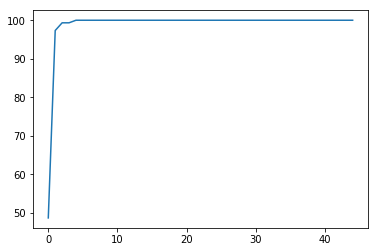

In [175]:
#test 
model = initialize_parameters(nn_input_dim = 5, nn_hdim = 10, nn_output_dim =3)
model, losses = train(model,X,y, learning_rate=0.03, epochs=4500, print_loss=True)
plt.plot(losses)

In [112]:
print(losses)

[33.33333333333333, 33.33333333333333, 30.0, 24.0, 26.0, 26.0, 26.666666666666668, 26.0, 26.0, 26.0]


In [156]:
path= "C:\\Users\\nguqu781\\Desktop\\9. Jupyter Notebook\\"
data  = pd.read_csv(path + "neural_net_data.csv" )
print(data.head(2))
# Get labels
y = data[['Cultivar 1', 'Cultivar 2', 'Cultivar 3']].values
# Get inputs; we define our x and y here.
X = data.drop(['Cultivar 1', 'Cultivar 2', 'Cultivar 3'], axis = 1).values 
X.shape, y.shape # Print shapes just to check

    Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   

   Color intensity       Hue  OD280/OD315 of diluted wines   Proline  \
0         0.251717  0.362177                      1.847920  1.013009   
1        -0.293321  0.406051                      1.113449  0.965242   

   Cultivar 1  Cultivar 2  Cultivar 3  
0           1           0           0  
1           1           0           0  


((178, 13), (178, 3))

Loss after iteration  0 : 6.731846516271419
Accuracy after iteration  0 : 26.40449438202247  %
Loss after iteration  100 : 0.7580784688204679
Accuracy after iteration  100 : 76.96629213483146  %
Loss after iteration  200 : 0.4239592320138007
Accuracy after iteration  200 : 86.51685393258427  %
Loss after iteration  300 : 0.3616849980758156
Accuracy after iteration  300 : 89.32584269662921  %
Loss after iteration  400 : 0.30425964825889534
Accuracy after iteration  400 : 91.57303370786516  %
Loss after iteration  500 : 0.26780868141814645
Accuracy after iteration  500 : 92.13483146067416  %
Loss after iteration  600 : 0.258885832511765
Accuracy after iteration  600 : 92.69662921348315  %
Loss after iteration  700 : 0.2528172930860468
Accuracy after iteration  700 : 93.25842696629213  %
Loss after iteration  800 : 0.24691270158234113
Accuracy after iteration  800 : 93.25842696629213  %
Loss after iteration  900 : 0.24155460812102952
Accuracy after iteration  900 : 93.25842696629213  %
Lo

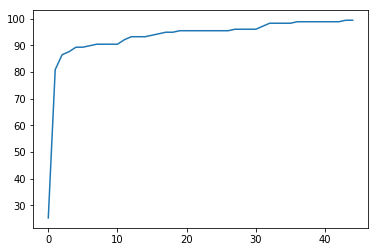

In [170]:
#test 
np.random.seed(100)
# This is what we return at the end
model = initialize_parameters(nn_input_dim=13, nn_hdim= 5, nn_output_dim= 3)
model = train(model,X,y,learning_rate=0.07,epochs=4500,print_loss=True)
plt.plot(losses)